## Why are isotopic anomalies in marine carbonates interpreted to record global climate change in the Earth’s past?

- Isotopic excursions (especially $\delta^{13}$C, and coupled with $\delta^{18}$O) in marine carbonates are envisioned as evidence for extreme climate change in the Neoproterozoic: catastrophic deglaciation following Snowball Earth events; rise of oxygen in the ocean/atmosphere to near modern levels; a planet that could support animal life in the long fuse to the cambrian explosion

- Carbon isotope chemostratigraphy may be used to temporally correlate sections globally, especially where geologically meaningful radiometric chronometers and fossils are nonexistent

- Before the Neoproterozoic, a billion years went by without evidence for glaciation or much of anything else exciting happening to Earth's climate state (according to Roger Buick in 1995, who studied very long sections of Mesoproterozoic marine carbonates in northwest Australia), making the appearance of isotopic fluctuations in the rock record especially intriguing for drawing causal links with climate change

- I'm ignoring diagenesis here, and adopting Kump 1999's 'optimistic view that globally representative values will be obtained for the isotopic composition of both inorganic and organic carbon for the geologic past'

***

### One-box model
'Interpreting carbon-isotope excursions: carbonates and organic matter' by Lee R. Kump and Michael A. Arthur (1999) in _Chemical Geology_. 



In the global carbon cycle, the ocean-atmosphere system can be thought of as a single surficial reservoir or 'box' that stores carbon. The size of this box ( M$_O$) changes in response to imbalances between inputs and outputs to geologic reservoirs. 

Feeding carbon into the ocean-atmosphere box are:
- $F_w$, the riverine input carrying material from both carbonate–mineral and ancient organic carbon weathering
- $F_{volc}$, flux of metamorphism/volcanism

Carbon exits the box as:
- $F_{b,org}$, organic carbon burial flux (aka shales)

- $F_{b,carb}$, carbonate mineral burial flux (aka marine carbonates)

So I get (1):

$
\frac{dM_O}{dt} = (F_w + F_{volc}) - (F_{b,org} + F_{b,carb})
$

Each of these fluxes has a distinct isotopic signature, based on whether it reflects mantle input or the preferential incorporation of light carbon into organic carbon reservoirs.

$
\frac{d}{dt}(M_O\delta_{carb}) = (F_w\delta_{w} + F_{volc}\delta_{volc}) - (F_{b,org}(\delta_{carb} + \Delta_B) + F_{b,carb}\delta_{carb})
$

where $\Delta_B$ is the isotopic fractionation between inorganic carbon and organic carbon during photosynthesis.

I can assume that volcanic and weathering input have the same (mantle) composition, so I combine them and call this flux $F'_w$. I want to solve for $\frac{d\delta_{carb}}{dt}$ to understand how perturbations to the inputs and outputs of carbon to the ocean/atmosphere are reflected in the isotopic signature of marine carbonate rocks.  Applying the product rule for calculus:

$
\frac{d}{dt}(M_O\delta_{carb}) = M_O\frac{d\delta_{carb}}{dt}+\delta_{carb}\frac{dM_O}{dt}
$

so plugging in equation (1)

$
M_O\frac{d\delta_{carb}}{dt}+\delta_{carb}(F'_w - F_{b,org} - F_{b,carb}) = F'_w\delta'_w - F_{b,org}\delta_{carb} - F_{b,org}\Delta_B - F_{b,carb}\delta_{carb}
$

$
M_O\frac{d\delta_{carb}}{dt} = F'_w\delta'_w - F_{b,org}\Delta_B - F'_w\delta_{carb}
$

I arrive at (3)

$
\frac{d\delta_{carb}}{dt} = \frac{F'_w(\delta'_w - \delta_{carb}) - F_{b,org}\Delta_B}{M_O}
$

### Steady state

Over long time scales, it makes sense to think about a 'background' steady-state where sources and sinks of carbon are in equilibrium, and the size of the ocean-atmosphere reservoir isn't changing.

$
\frac{d\delta_{carb}}{dt} = \frac{F'_w(\delta'_w - \delta_{carb}) - F_{b,org}\Delta_B}{M_O} = 0
$

If sources equal sinks, $F'_w = F_{b,org} + F_{b,carb}$ (from equation (1))

so

$
\frac{F'_w(\delta'_w - \delta_{carb})}{F'_w} - \frac{F_{b,org}\Delta_B}{F_{b,org} + F_{b,carb}} = 0
$

The quantity $\frac{F_{b,org}}{F_{b,org} + F_{b,carb}}$ can be thought of as $f_{org}$, the fraction of the carbon sink that is buried as organic carbon.

$
\delta'_w - \delta_{carb} = f_{org}\Delta_B
$

Solving for $f_{org}$ gets me to equation (4)

$
f_{org} = \frac{\delta'_w - \delta_{carb}}{\Delta_B}
$

I can rearrange this to take the form of a linear equation, where $\delta_{carb}$ is dependent on the organic carbon burial fraction $f_{org}$, and plot the results.

In [1]:
#import useful packages
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint #differential equation solver
%matplotlib inline

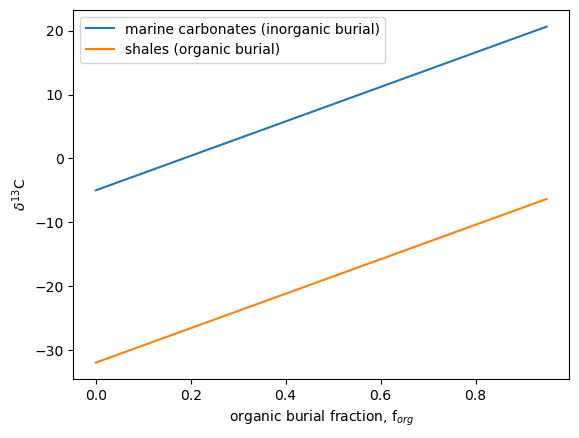

In [2]:
deltaC_w = -5; #the 'mantle' value for carbon inputed to the ocean-atmosphere
DeltaB = -27; #assume constant fractionation between organic and inorganic carbon uptake
fOrg = np.arange(0,1,0.05);
deltaC_carb = -1*(fOrg*DeltaB-deltaC_w);
deltaC_org = deltaC_carb + DeltaB;

plt.plot(fOrg,deltaC_carb)
plt.plot(fOrg,deltaC_org)
plt.xlabel('organic burial fraction, f$_{org}$')
plt.ylabel('$\delta^{13}$C')
plt.legend(['marine carbonates (inorganic burial)','shales (organic burial)'])
plt.show()

This plot assumes constant isotopic fractionation ($\Delta_B$) between organic and inorganic carbon uptake during photosynthesis.  

A couple interesting things to note about this plot:
- The modern-day ocean is $\delta^{13}$C = 0. This corresponds to $f_{org}$ = 0.2.
- If there is no organic carbon burial (for example, if pretty much all biological productivity is killed off when ice sheets seal the ocean from the atmosphere) then at $f_{org}$ = 0 the $\delta^{13}$C of marine carbonates must match the mantle inputs at about -5 per mil

### Carbon isotopes through time

I can feed equation (3) to a numerical ordinary differential equation solver to visualize the primary isotopic signature of carbonates through time.

First I plug in constant values for a mass- and isotope-balanced atmosphere/ocean reservoir and fluxes of carbon in and out to achieve steady-state. These values are from Kump (1999) and result in steady-state at slightly higher pCO$_2$ than today, consistent with the overarching Phanerozoic record.

_Run this function first to spin up to a steady-state value:_

In [3]:
#define a function that returns the ODEs to be solved
def C_oneboxdMdt(J,t):
    
    #define variables; reservoir sizes and isotopic compositions of fluxes are from kump 1999's figure 1
    d13C_wPrime = -5.17 # isotopes of combined riverine input (organic carbon + ancient carbonate weathering + volcanic/mantle flux)
    d13C_org = -29; #isotopic composition of organic burial flux
    DeltaB = -27; #assume constant fractionation between organic and inorganic carbon uptake
    
    
    F_b_org = 10000; #organic burial flux in 10^12 mol/kyr
    M_O = 3.8*10**6 + 100000; #size of the ocean+atmosphere reservoir of C in 10^12 mol
    F_wPrime = 6000 + 10000 + 34000; #volcanic + organic carbon + carbonate weathering flux of C in 10^12 mol/kyr
    F_b_carb = F_wPrime - F_b_org; #carbonate burial flux in 10^12 mol/kyr. assumes Kump's equation 5 equilibrium (that increased weathering is balanced by increased calcium carbonate deposition instantaneously).
    
    #assign each ODE to an element of J
    M_O = J[0] #unnecessary right now, but I want to make J a matrix and Python complains
    d13C_carb = J[1]
    
    #ODE for changing reservoir size - ignore for now
    dM_Odt = (F_wPrime * (d13C_wPrime - d13C_carb) - F_b_org * (d13C_org - d13C_carb)) / M_O
    
    
    #ODE for marine carbonate carbon isotopes
    d13C_carbdt = (F_wPrime * (d13C_wPrime - d13C_carb) - F_b_org * (d13C_org - d13C_carb)) / M_O
    
    return [dM_Odt, d13C_carbdt]

_Initial Conditions:_

In [8]:
#set initial conditions
M_O_0 = 3.8*10**6 + 100000 #initial ocean reservoir size
d13C_carb_0 = 0 #initial marine carbonate isotopic composition (per mil)

J0 = [M_O_0, d13C_carb_0]

_Integrate:_

In [9]:
#integrate ODEs
tspan = np.linspace(-500,1500,2000) #integrate over the timespan 0 to 1500 kyr with a 1 kyr timestep
J = odeint(C_oneboxdMdt,J0,tspan)

M_O = J[:,0]
d13C_carb = J[:,1]


d13C_org = d13C_carb + DeltaB;

_Plot:_

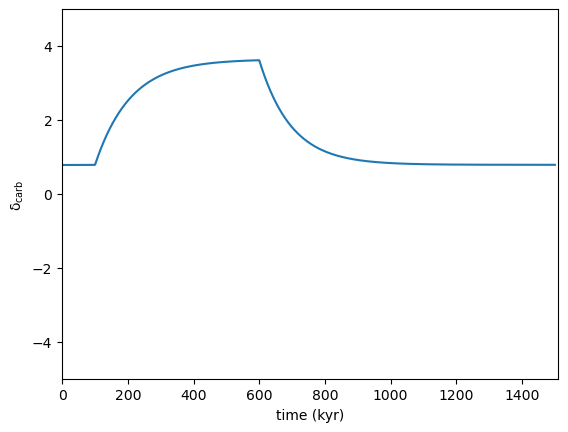

3.6013762025130065


In [10]:
#make plots
plt.plot(tspan,d13C_carb)
plt.xlabel('time (kyr)')
plt.ylabel(r'$\mathdefault{\delta_{carb}}$')
plt.ylim([-5, 5])
plt.xlim([0, 1510])

plt.show()

print(d13C_carb[1100])

### Organic carbon burial

The classic 'lever' interpreted to be responsible for carbon isotope excursions in the marine carbonate record is a change in the fraction of organic carbon burial, as a result of a change in biological productivity (or alternatively, a change in preservation - Eliel's paper).

Run the function below to induce a 500 kyr perturbation of increased organic carbon burial, as in Kump 1999's Figure 3. Then, run the three cells above again (Initial Conditions, Integrate, Plot) to make the plot.

In [7]:
#define a function that returns the ODEs to be solved
def C_oneboxdMdt(J,t):
    
    #define variables; reservoir sizes and isotopic compositions of fluxes are from kump's figure 1
    d13C_wPrime = -5.17 # isotopes of combined riverine input (organic carbon + ancient carbonate weathering + volcanic/mantle flux)
    d13C_org = -29; #isotopic composition of organic burial flux
    
    if t > 100 and t < 600: 
        F_b_org = 13500; #organic burial flux in 10^12 mol/kyr - perturbation to replicate kump's plot
        #F_b_org = 100; #organic burial flux in 10^12 mol/kyr - perturbation to replicate hoffman's 1998 prediction
    else:
        F_b_org = 10000; #organic burial flux in 10^12 mol/kyr - background
    M_O = 3.8*10**6 + 100000; #size of the ocean+atmosphere reservoir of C in 10^12 mol
    F_wPrime = 6000 + 10000 + 34000; #volcanic + organic carbon + carbonate weathering flux of C in 10^12 mol/kyr
    F_b_carb = F_wPrime - F_b_org; #carbonate burial flux in 10^12 mol/kyr. assumes Kump's equation 5 equilibrium (that increased weathering is balanced by increased calcium carbonate deposition instantaneously).
    
    #assign each ODE to an element of J
    M_O = J[0]
    d13C_carb = J[1]
    
    
    #ODE for phosphate concentration
    dM_Odt = (F_wPrime * (d13C_wPrime - d13C_carb) - F_b_org * (d13C_org - d13C_carb)) / M_O
    
    #ODE for marine carbonate carbon isotopes
    d13C_carbdt = (F_wPrime * (d13C_wPrime - d13C_carb) - F_b_org * (d13C_org - d13C_carb)) / M_O
    
    return [dM_Odt, d13C_carbdt]

### Photosynthetic sensitivity to CO$_2$

Kump (1999) proposes that by measuring both marine inorganic carbonate and organic carbon isotopes from the same samples, information can be obtained directly about climate. They model the effect of PCO$_2$ on the fractionation of light carbon into organic matter during photosynthesis (variable $\Delta_B$). In their model $\Delta_B$ is inversely dependent on pCO$_2$:

$
\Delta_B = (\frac{159.5[PO_4] + 38.39}{0.034pCO_2}) - 33
$

If I pick a value for PO$_4$ concentration (Kump selects 0.25 μmol/kg as a typical oligotrophic surface ocean value) I can plot the $y = 1/x$ relationship.

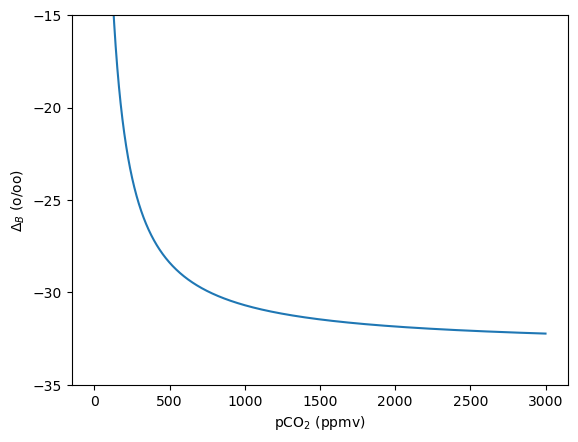

In [8]:
# [PO$_4$] is fixed at 0.25 $\mu$mol/kg, taken as a typical value for an oligotrophic surface-ocean.
PO4 = 0.25

#range of possible atmospheric pCO$_2$ values in ppmv, assumed to be the same as [CO$_2$] in the surface ocean
pCO2 = np.arange(1,3001,1)

#$\delta_B$ is the isotopic difference between carbonate and organic carbon
#Eqn 10:
delB = ((159.5*PO4+38.39)/(0.034*pCO2))-33

fig, ax = plt.subplots()
ax.plot(pCO2,delB)
ax.set_ylim([-35, -15])
ax.xaxis.set_label_text('pCO$_2$ (ppmv)')
ax.yaxis.set_label_text('$\Delta_B$ (o/oo)')
ax.yaxis.set_ticks(np.arange(-35,-10,5))
plt.show()

At high pCO$_2$, $\Delta_B$ gets larger, reaching an asymptotic value of -33 with the values they chose.

In John's MATLAB code, I got rid of the Epsilond13C function. I defined fractionation values within the dMdt function (although maybe that is unnecessary?). In the main script, after running the differential equation solvers to calculate alkalinity and CO2, I recalculated epsilon 5 (photosynthesis fractionation) through time to be dependent on the solved-for pCO2 values according to Kump's equation 10. 



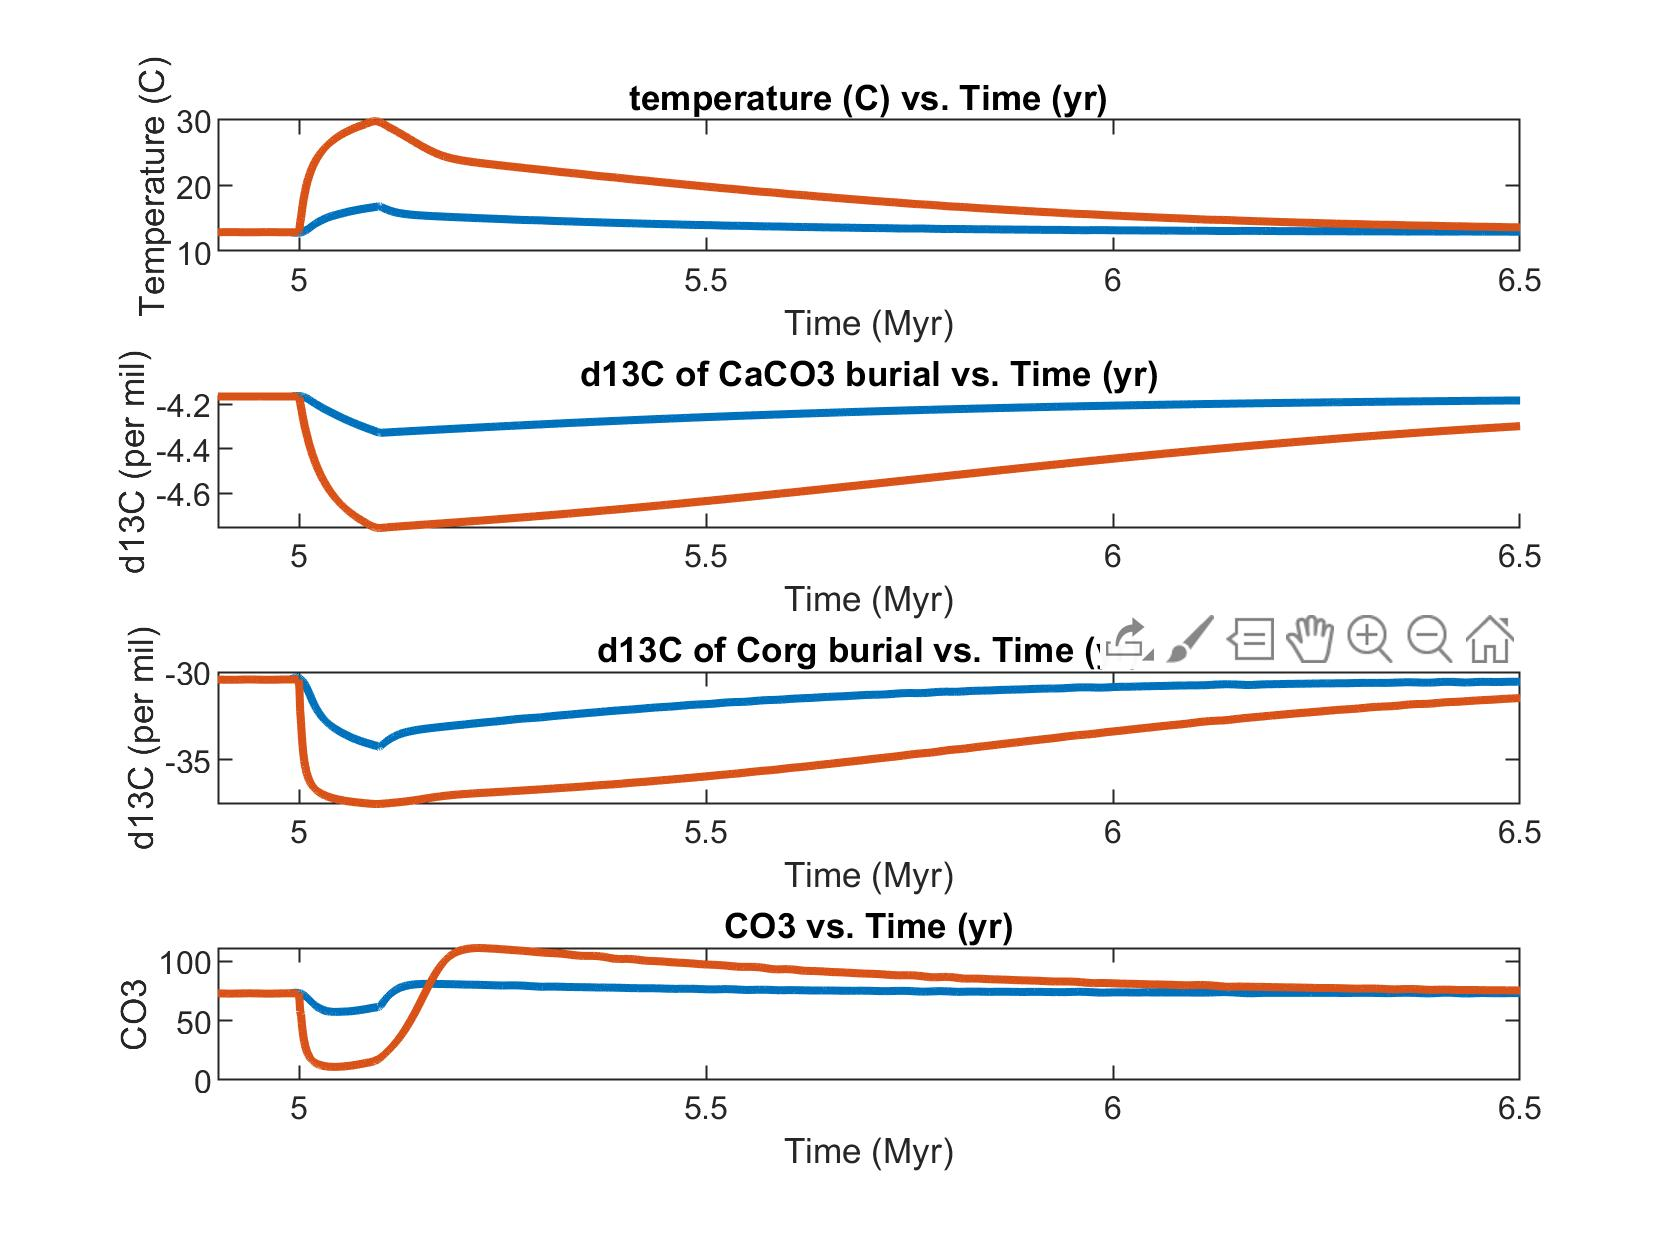

Blue line is a '1/10 Siberian Traps' volcanic outgassing perturbation, and red line is John's OG Siberian Traps code's Traps flux.

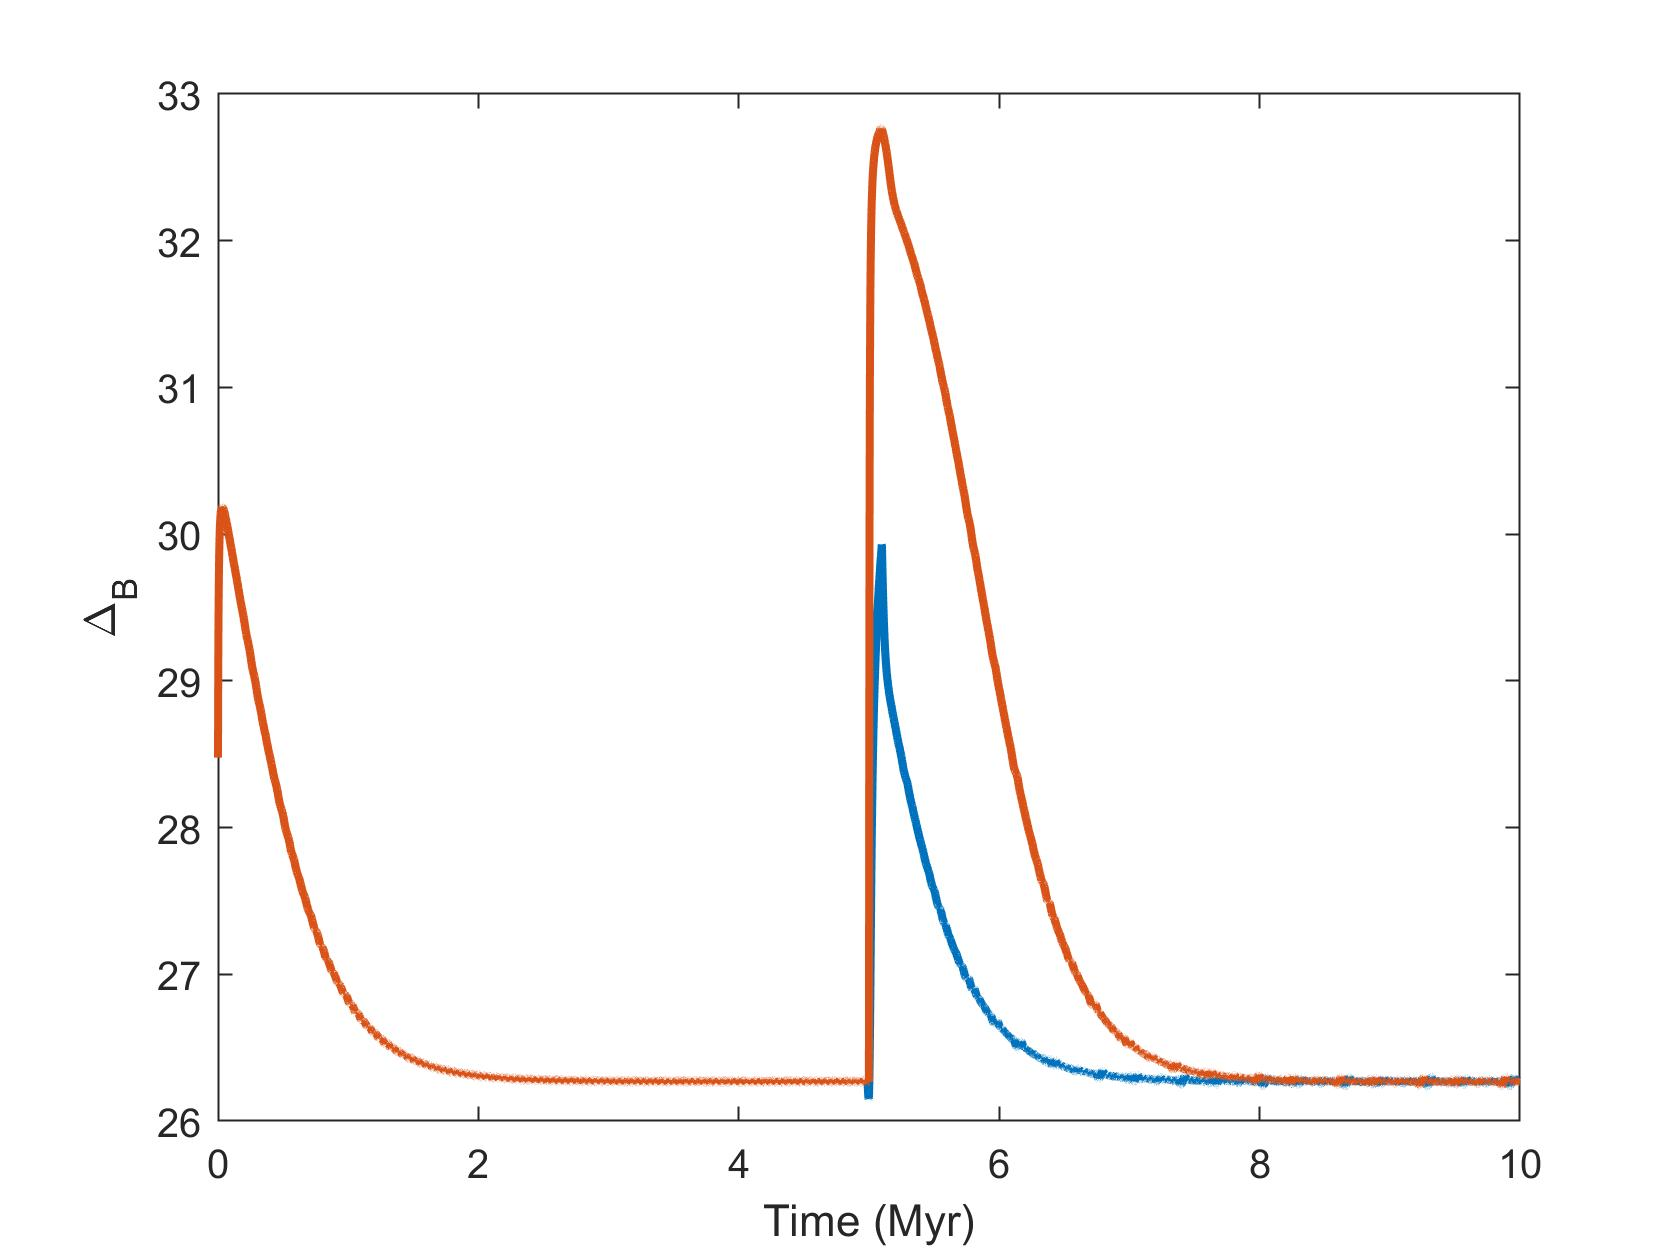

### Alkalinity (silicate weathering)

In John's code, I simulated Kump's suggestion of increasing organic carbon burial by roughly 50%. Organic carbon burial is parameterized in terms of $f_{org}$. I set organic carbon burial at a background value of a quarter of the mantle/volcanic outgassing input, so $f_{org}$ = 0.2, then bumped it up to 0.45 for a duration of 500kyr.

In this version I shut off the silicate weathering feedback by setting dJdt(2) = 0 in the dMdt function.

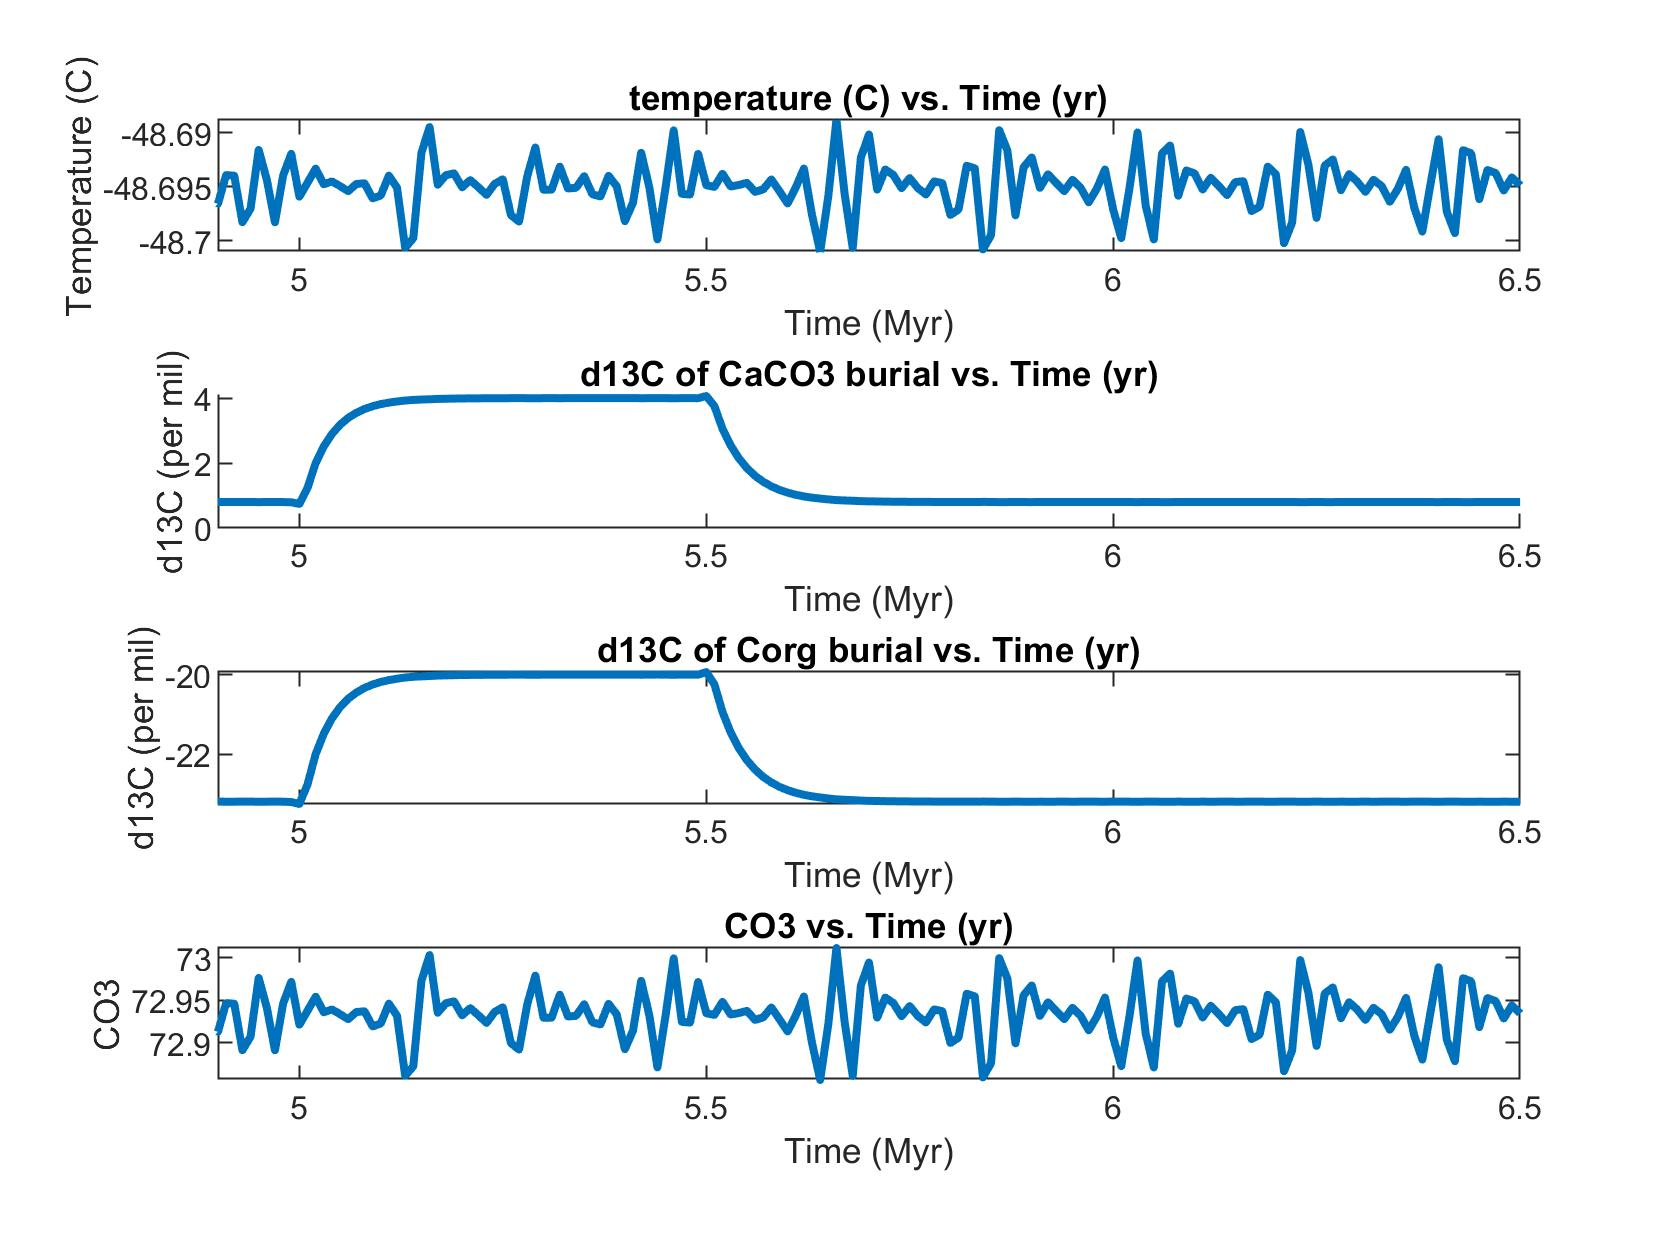

Then I turned it back on.

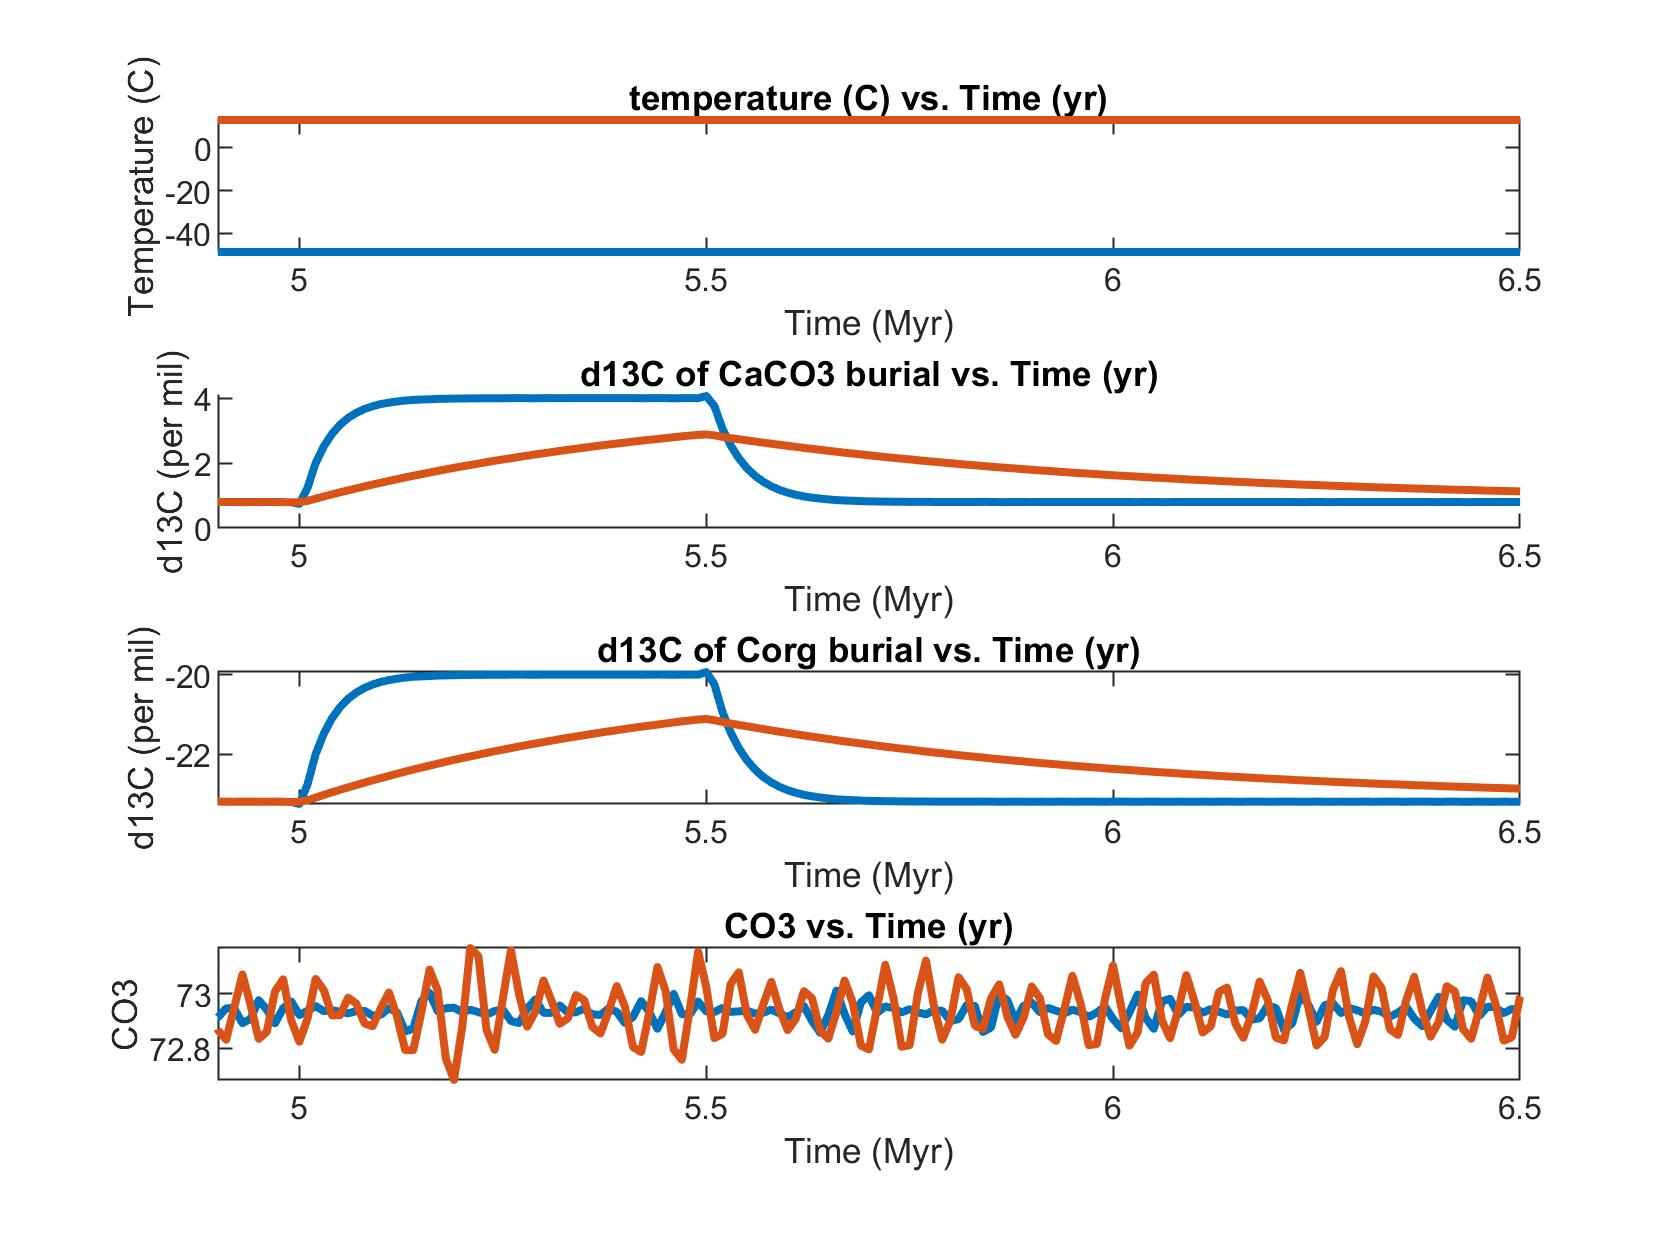

'The role of the global carbonate cycle in the regulation and evolution of the Earth system' by Andy Ridgwell and Richard Zeebe (2005) in _EPSL Frontiers_. 

Precipitation of calcium carbonate:

$Ca^{2+} + 2HCO_3^- --> CO_2(aq) + H_2O + CaCO_3$

Acts to *add* CO$_2$ to the ocean-atmosphere system. Because total dissolved inorganic carbon in the ocean (DIC) is driven up by precipitation, atmospheric CO$_2$ will go up to maintain atmosphere-surface ocean equilibrium.

The carbonate compensation depth is where dissolution of CaCO$_3$ balances out the 'rain flux' of calcite to sediments - no new calcite forming, because the ocean is undersaturated (K$_{sp}$ and saturation $\Omega$ are inversely related, K$_{sp}$ gets bigger with increasing pressure) once you get down to that depth. ALthough, in the water column today, a lot of calcium carbonate seems to dissolve above this depth - a mystery that needs to be solved to understand how the ocean will continue to function as a carbon sink in response to anthropogenic emissions.

Calcite precipitation is thermodynamically unfavorable and so even though the surface ocean everywhere today is very oversaturated with respect to CaCO$_3$, it takes biological drivers to form it. 

Calcium carbonate accumulation and incorporation into deep-sea sediments is the ultimate 'sink' for carbon back into geological reservoirs - and for calcium ions. This is balanced out by weathering of silicate and carbonate rocks.

Weathering of silicate rocks supplies the bicarbonate ions on the left/reactant side of the precipitation reaction:

$2CO_2 + H_2O + CaSiO_3 --> Ca^{2+} + 2HCO_3^- + SiO_2$

*The reason silicate weathering, followed by carbonate burial, is a net SINK for CO$_2$ is because only 1 CO$_2$ molecule is released for the consumption of every 2 bicarbonate ions*

Silicate weathering is a negative feedback loop; you increase temperature and atmospheric CO$_2$ and you start weathering silicates faster. Which then sequesters CO$_2$ in calcium carbonate, drawing down temperature.

On short timescales calcium carbonate precipitation is its own negative feedback loop with atmospheric carbon dioxide ('carbonate compensation'). pH increases as you decrease CO2 in the ocean-atmosphere system (because you release more carbonate ions, CO$_3^{2-}$), making calcium carbonate more stable, which in turn allows for more CO2 production.

Precambrian carbon cycle: all you need is continents, which are weathered and deliver cations to the ocean; eventually you will saturate calcium carbonate.

It wasn't until the Mesozoic that deep-sea (pelagic) carbonate sink took off - before carbonate compensation allowed for this ready negative feedback with CO2, climate was more sensitive to perturbation.